# Project Title: **Predicting Housing Prices in Boston**

## Objective

In this project, the goal is to predict housing prices in Boston using a variety of features from the Boston housing dataset. The dataset includes key characteristics such as crime rates, average number of rooms, distance to employment centers, and other socio-economic factors that potentially influence the price of homes. The focus is on answering the following questions:

- How can we use the data to predict housing prices?
- Which factors are the best predictors of housing prices?

The analysis aims to provide actionable insights for Urban Vision, a nonprofit focused on affordable housing and community development, to better understand the housing landscape in Boston and make informed decisions about future housing projects.

## Data Overview

The Boston housing dataset contains information on various predictors for the median house value (medv) across different census tracts in the city. The dataset includes both quantitative and qualitative variables, such as:

- **crim**: Crime rate by town
- **zn**: Proportion of residential land zoned for large lots
- **indus**: Proportion of non-retail business acres per town
- **chas**: Dummy variable indicating proximity to the Charles River
- **nox**: Nitric oxides concentration
- **rm**: Average number of rooms per dwelling
- **age**: Proportion of owner-occupied units built before 1940
- **dis**: Weighted distances to employment centers
- **rad**: Index of accessibility to radial highways
- **tax**: Property tax rate
- **ptratio**: Pupil-teacher ratio by town
- **lstat**: Percentage of lower status of the population
- **medv**: Median house value in $1000s (target variable)


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline


df = pd.read_csv("data/Boston.csv",usecols=range(1,14))

In [2]:
# Understanding the size of the dataframe and ensuring there is no NaNs
# Ying addition -- from class
print (df.shape)
np.sum(pd.isna(df))

(506, 13)


/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

Ying addition

From above, we can see that there is no missing data and there are 506 observations with 13 features. In the snapshot of the dataframe below and the feature descriptions, we can also see that the unit of observations is by town. However, there are only approximately 141 cities and towns in the Greater Boston area, so we would need clarification on the unit of observation.

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Methodology

1. **Data Preprocessing and Exploration**
   - **Summary Statistics**: We began by generating summary statistics of the dataset to understand the distributions and key characteristics of the features using `describe()` method.
   - **Train-Test Split**: The dataset was split into training (80%) and testing (20%) sets using `train_test_split` to ensure that model performance could be evaluated properly and to avoid overfitting.
   - **Scaling**: We scaled the numerical features using `StandardScaler` to normalize the data. This ensures that features with large numerical ranges don't dominate the model.

2. **Modeling**
   - **Linear Regression Model**: We employed a linear regression model to predict housing prices. This was chosen due to the continuous nature of the target variable (`medv`), and the assumption that relationships between predictors and the target variable may be approximately linear.
   - **Model Fitting**: The model was trained using the scaled features from the training set.

3. **Evaluation**
   - We used multiple performance metrics to assess the model, including:
     - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.
     - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
     - **Root Mean Squared Error (RMSE)**: The square root of MSE, providing a more interpretable metric in terms of the unit of the target variable.
     - **R-squared (R2)**: Indicates the proportion of variance in the dependent variable that is predictable from the independent variables.

4. **Visualization**
   - **Predicted vs. Actual Plot**: A scatterplot was created to visualize the relationship between the predicted and actual median house values. A red dashed line at 45 degrees indicates perfect predictions.
   - **Residual Plot**: A histogram of residuals (the difference between the actual and predicted values) was plotted to assess the distribution of prediction errors and check for any patterns that might indicate model inadequacy.


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


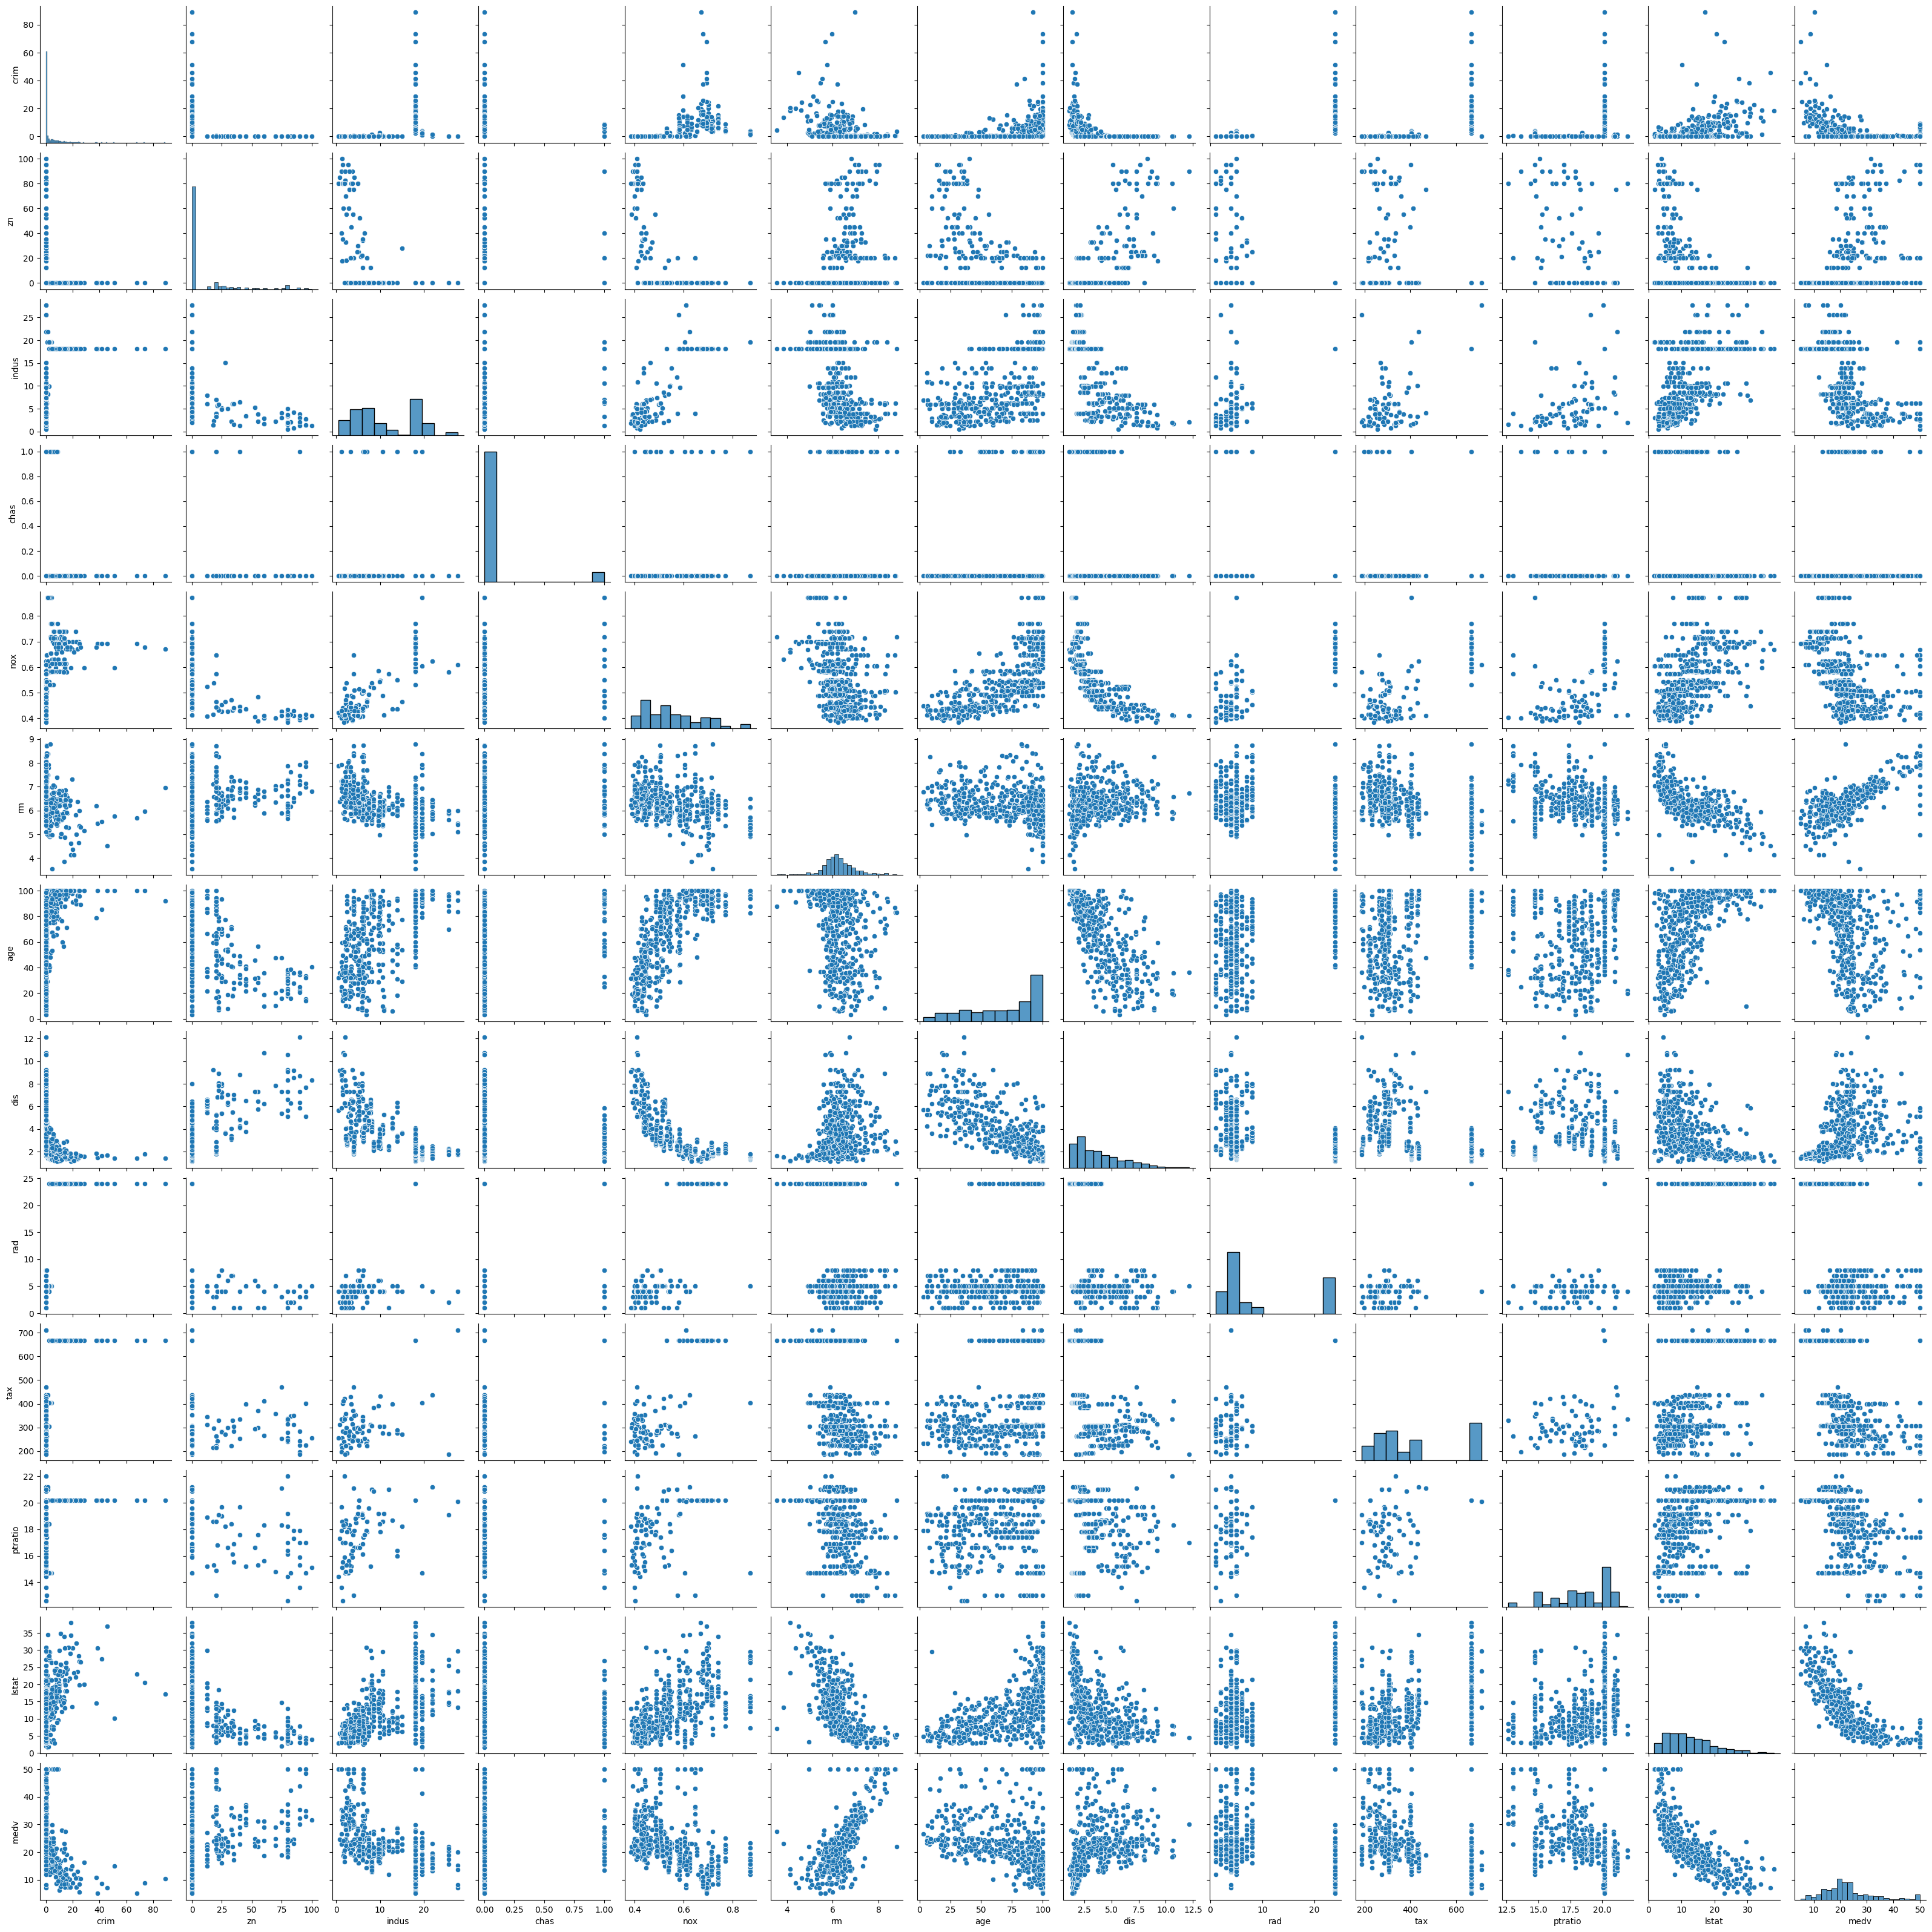

In [5]:
sns.pairplot(df)

#### Ying addition -- see what we want to keep

Looking at the histograms of the variables, we can see a right skewed distribution for factors including crim, zn, dis, and lstat and a left skewed distribution for factors including age and ptratio. This indicates a potential need to tranform these features to satisfy assumptions of the linear regression. 

Prior to building models, we can further explore relationships between the features and the y-variable, medv. 

In [6]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


Looking at the last row of scatterplots which shows the other features against the median value of owner-occupied homes in $1000s, we can see that factors such as crim, zn, nox, rm, rad, tax, ptratio, and lstat have correlations with median values of homes. Since our goal is to assist issues of housing affordability, a beneficial step would be identifying the characteristics of areas that have high prices and comparing to the characteristics of areas with low prices. 

In [7]:
high_prices = df[(df["medv"]>df["medv"].quantile(0.80))]
high_prices.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.631501,28.782178,5.564554,0.118812,0.490435,7.192990,54.821782,4.394886,5.663366,304.742574,16.486139,5.415644,37.161386
std,1.595083,32.860875,5.117536,0.325181,0.080829,0.622245,28.146075,2.154758,5.002554,109.550778,2.107085,2.409991,7.511311
min,0.009060,0.000000,0.460000,0.000000,0.394000,4.970000,6.800000,1.129600,1.000000,187.000000,12.600000,1.730000,28.400000
25%,0.037680,0.000000,2.460000,0.000000,0.433000,6.812000,31.900000,2.847000,3.000000,244.000000,14.900000,3.730000,31.100000
50%,0.081870,20.000000,3.780000,0.000000,0.464000,7.135000,53.600000,3.838400,5.000000,270.000000,17.400000,4.740000,34.900000
75%,0.511830,45.000000,6.200000,0.000000,0.507000,7.520000,80.800000,5.960400,5.000000,329.000000,17.800000,6.650000,43.500000
max,9.232300,100.000000,19.580000,1.000000,0.668000,8.725000,100.000000,12.126500,24.000000,666.000000,20.200000,14.790000,50.000000


In [8]:
low_prices = df[(df["medv"]<df["medv"].quantile(0.20))]
low_prices.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,12.853867,0.123762,17.445842,0.009901,0.669901,5.882832,93.914851,2.119956,18.871287,598.455446,19.978218,22.105743,11.850495
std,15.116099,1.243796,4.070455,0.099504,0.079363,0.622606,7.212245,0.952734,8.763177,136.370563,1.369862,5.795609,2.700949
min,0.047410,0.000000,6.910000,0.000000,0.448000,4.138000,59.700000,1.137000,1.000000,233.000000,14.700000,7.880000,5.000000
25%,3.321050,0.000000,18.100000,0.000000,0.614000,5.520000,92.400000,1.580400,5.000000,666.000000,20.200000,18.030000,10.200000
50%,9.329090,0.000000,18.100000,0.000000,0.693000,5.957000,96.000000,1.822600,24.000000,666.000000,20.200000,21.080000,12.700000
75%,15.177200,0.000000,18.100000,0.000000,0.713000,6.343000,98.900000,2.198000,24.000000,666.000000,20.200000,25.680000,13.900000
max,88.976200,12.500000,27.740000,1.000000,0.871000,7.313000,100.000000,6.346700,24.000000,711.000000,21.200000,37.970000,15.200000


Extracting the town data for the towns with the top 20th percentile median value and the towns with the lowest 20th percentile median value, we can observe that compared to towns with the highest housing value, towns with cheapest housing value have:

- higher crime rate

- lower proportion of residential land

- higher proportion of non-retail business (factories)

- lower access to transportion and scenary as demonstrated by the lower chas and rad values

- higher nitric oxide (indicator of air pollution)

- older housing and higher property tax

- higher percentage of lower-status population.

These observations are not suprising, for town prices are impacted by safety levels, health risk levels, access to transportation, and amount of resources circulating in the neighborhood. 

### potential graphs we can use to visualize this difference

Chose the top 7 features with greatest correlation value

In [9]:
low_prices_df = pd.DataFrame(low_prices)
low_prices_df.reset_index(inplace=True)
low_prices_df["price_cat"] = "low"

high_prices_df = pd.DataFrame(high_prices)
high_prices_df.reset_index(inplace=True)
high_prices_df["price_cat"] = "high"
combined_df = pd.concat([low_prices_df, high_prices_df])


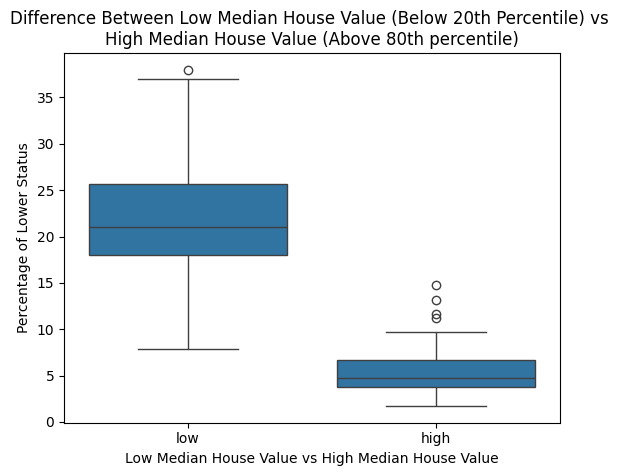

In [10]:
sns.boxplot(x="price_cat", y="lstat", data=combined_df)
plt.title("Difference Between Low Median House Value (Below 20th Percentile) vs \n" \
"High Median House Value (Above 80th percentile)")
plt.xlabel("Low Median House Value vs High Median House Value")
plt.ylabel("Percentage of Lower Status")
plt.show()

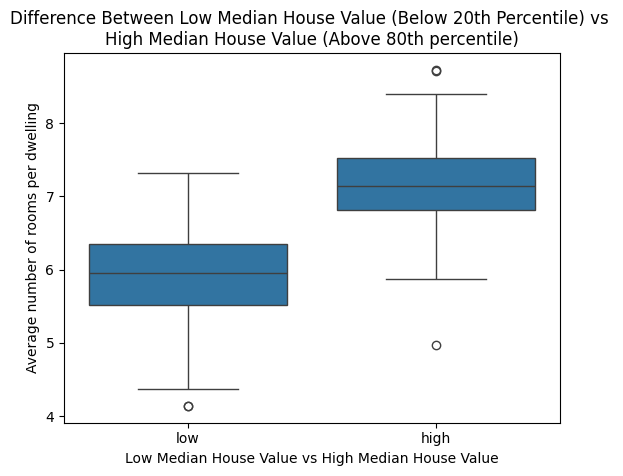

In [11]:
sns.boxplot(x="price_cat", y="rm", data=combined_df)
plt.title("Difference Between Low Median House Value (Below 20th Percentile) vs \n" \
"High Median House Value (Above 80th percentile)")
plt.xlabel("Low Median House Value vs High Median House Value")
plt.ylabel("Average number of rooms per dwelling")
plt.show()

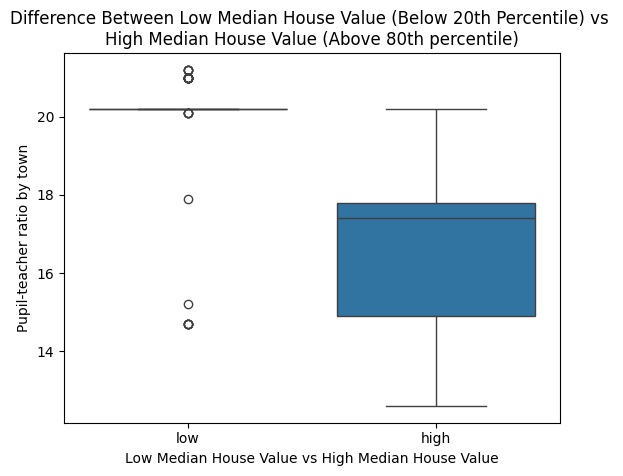

In [12]:
sns.boxplot(x="price_cat", y="ptratio", data=combined_df)
plt.title("Difference Between Low Median House Value (Below 20th Percentile) vs \n" \
"High Median House Value (Above 80th percentile)")
plt.xlabel("Low Median House Value vs High Median House Value")
plt.ylabel("Pupil-teacher ratio by town")
plt.show()

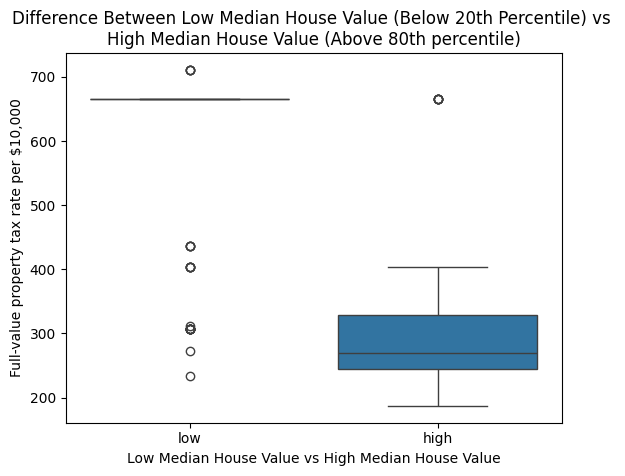

In [13]:
sns.boxplot(x="price_cat", y="tax", data=combined_df)
plt.title("Difference Between Low Median House Value (Below 20th Percentile) vs \n" \
"High Median House Value (Above 80th percentile)")
plt.xlabel("Low Median House Value vs High Median House Value")
plt.ylabel("Full-value property tax rate per $10,000")
plt.show()

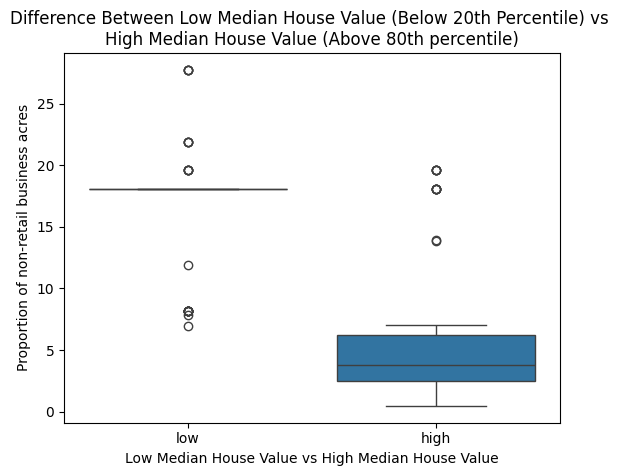

In [14]:
sns.boxplot(x="price_cat", y="indus", data=combined_df)
plt.title("Difference Between Low Median House Value (Below 20th Percentile) vs \n" \
"High Median House Value (Above 80th percentile)")
plt.xlabel("Low Median House Value vs High Median House Value")
plt.ylabel("Proportion of non-retail business acres")
plt.show()

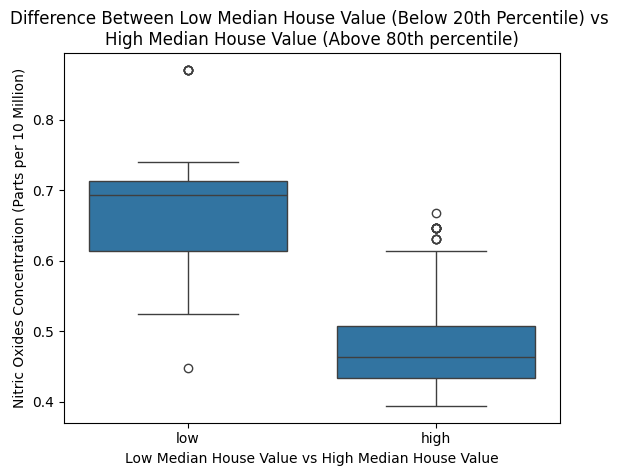

In [28]:
sns.boxplot(x="price_cat", y="nox", data=combined_df)
plt.title("Difference Between Low Median House Value (Below 20th Percentile) vs \n" \
"High Median House Value (Above 80th percentile)")
plt.xlabel("Low Median House Value vs High Median House Value")
plt.ylabel("Nitric Oxides Concentration (Parts per 10 Million)")
plt.show()

After exploring some characteristics of towns with low median house values and towns with high median house values, we will now try to measure the significance or impact of these factors.

As mentioned in the analysis of the pair plot, these factors are skewed and will need some tranformation to ensure an approximately normal distribution.

In particular, we can see a right skewed distribution for factors including crim, zn, dis, and lstat and a left skewed distribution for factors including age and ptratio. This indicate a potential need to tranform these features to satisfy assumptions of the linear regression. 

/home/codespace/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


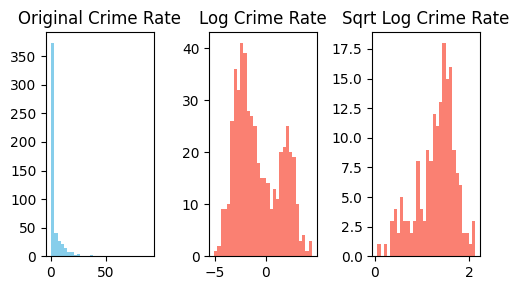

In [16]:
df_transformed = df.copy()

df_transformed["logCrim"] = np.log(df_transformed["crim"])
df_transformed["sqrtCrim"] = np.sqrt(df_transformed["logCrim"])
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))
axes[0].hist(df_transformed["crim"], bins=30, color='skyblue')
axes[0].set_title("Original Crime Rate")
axes[1].hist(df_transformed["logCrim"], bins=30, color='salmon')
axes[1].set_title("Log Crime Rate")
axes[2].hist(df_transformed["sqrtCrim"], bins=30, color='salmon')
axes[2].set_title("Sqrt Log Crime Rate")
fig.tight_layout()

plt.show()


Since there are a lot of 0 values for zn, it will return -infinity when the log transformation is taken. As a result, we tried using the square root transformation and log tranformation after adjusting the values by 1, but the distribution is not normal after the transformation.


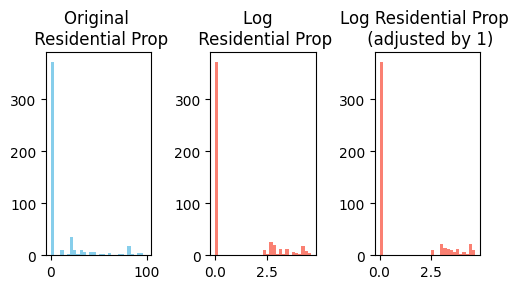

In [17]:
df_transformed["logZn"] = np.log(df_transformed["zn"]+1)
df_transformed["sqrtZn"] = np.cbrt(df_transformed["zn"])
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))
axes[0].hist(df_transformed["zn"], bins=30, color='skyblue')
axes[0].set_title("Original \n Residential Prop")
axes[1].hist(df_transformed["sqrtZn"], bins=30, color='salmon')
axes[1].set_title("Log  \n Residential Prop")
axes[2].hist(df_transformed["logZn"], bins=30, color='salmon')
axes[2].set_title("Log Residential Prop \n (adjusted by 1)")
fig.tight_layout()

plt.show()

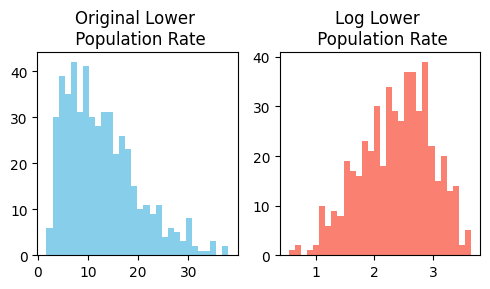

In [18]:
df_transformed["logLstat"] = np.log(df_transformed["lstat"])
#df_transformed["sqrtCrim"] = np.sqrt(df_transformed["logCrim"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].hist(df_transformed["lstat"], bins=30, color='skyblue')
axes[0].set_title("Original Lower \n Population Rate")
axes[1].hist(df_transformed["logLstat"], bins=30, color='salmon')
axes[1].set_title("Log Lower \n Population Rate")
fig.tight_layout()

plt.show()

The log tranformation for this feature did not seem to assist with normality. 

### End of Ying added stuff

In [19]:
# Split data into training and testing sets
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Create a pipeline with scaling and regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}

In [21]:
# Perform cross-validation
cv_results = cross_validate(pipeline, X_train, y_train, cv=kf, scoring=scoring, return_train_score=True)

## Results

- **Model Performance**: The model produced the following evaluation metrics:

  - **MAE**: Mean Absolute Error
  - **MSE**: Mean Squared Error
  - **RMSE**: Root Mean Squared Error
  - **R²**: R-squared (Proportion of variance explained)

- **Key Insights from Visualizations**:
  - The predicted vs. actual plot showed that the linear regression model generally performs well for most of the data points. However, there are some outliers where the predictions are less accurate.
  - The residual plot indicates a fairly normal distribution of residuals, suggesting that the assumptions of linear regression may hold. However, further examination might be needed to confirm the adequacy of the model.


In [22]:
# Extract mean scores from cross-validation
mean_r2 = np.mean(cv_results['test_r2'])
mean_mse = -np.mean(cv_results['test_mse'])  # Convert to positive
mean_mae = -np.mean(cv_results['test_mae'])  # Convert to positive

print(f"Cross-validated R²: {mean_r2:.2f}")
print(f"Cross-validated MSE: {mean_mse:.2f}")
print(f"Cross-validated MAE: {mean_mae:.2f}")



Cross-validated R²: 0.71
Cross-validated MSE: 25.30
Cross-validated MAE: 3.56


In [23]:
# Train model on full training set
pipeline.fit(X_train, y_train)

# Make predictions on test set
y_pred = pipeline.predict(X_test)

# Evaluate on test set
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

print(f"Test R²: {test_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Test R²: 0.69
Test MSE: 22.78
Test MAE: 3.11


### Ying: I added a code snippet I made for forward selection from another project, since I don't think Python has a function for that -- correct me if i am wrong

In [24]:
def training_test_resultRF(df):
    X = df.drop(columns=["medv"]).values
    y = df['medv'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

    model_sc = LinearRegression()
    #MSEs are larger than RF
    #model_sc = GradientBoostingRegressor(learning_rate=0.05, min_samples_split=5)
    #model_sc = LinearRegression()
    model_sc.fit(X_train,y_train)  

    #insample_predictions_sc = model_sc.predict(X_train) 
    #train_mse = mean_squared_error(y_train, insample_predictions_sc)

    outsample_predictions_sc = model_sc.predict(X_test)
    test_mse = mean_squared_error(y_test, outsample_predictions_sc)

    #print (f"The train MSE value is {train_mse} and the test MSE is {test_mse}")
    return (test_mse)

def forwardSelection (df):
    all_features = list(df.drop(columns=['medv']).columns)
    selected_features = []
    best_test_mse_list = []
    for numvar in range (1,len(all_features)+1):
        temp_best_test_mse = 1000000
        for feature in all_features:
            if (feature in selected_features):
                next;
            else: 
                temp_features = selected_features +  [feature]
                temp_test_mse = training_test_resultRF(df[temp_features + ['medv']])
                if temp_test_mse < temp_best_test_mse:
                    temp_best_test_mse = temp_test_mse
                    temp_best_feature = feature
        # add the best feature for that given round (considering models of i features)
        selected_features.append(temp_best_feature)
        best_test_mse_list.append(temp_best_test_mse)
        # print (f"For model with {numvar} variables, the next best feature is {temp_best_feature}")
    print (best_test_mse_list)
    print (selected_features)
    return (best_test_mse_list)

[38.68755662089717, 35.22536624931007, 33.406590168621356, 32.986326936037656, 31.89585461662037, 31.454975691452827, 31.698840514831414, 28.410251987691684, 27.09292852261475, 26.92006231393649, 27.018176606001127, 29.47728559692364]
['lstat', 'ptratio', 'chas', 'rad', 'tax', 'crim', 'nox', 'dis', 'zn', 'age', 'indus', 'rm']


Text(0, 0.5, 'Test MSE of Best Model at a Given Number of Variables')

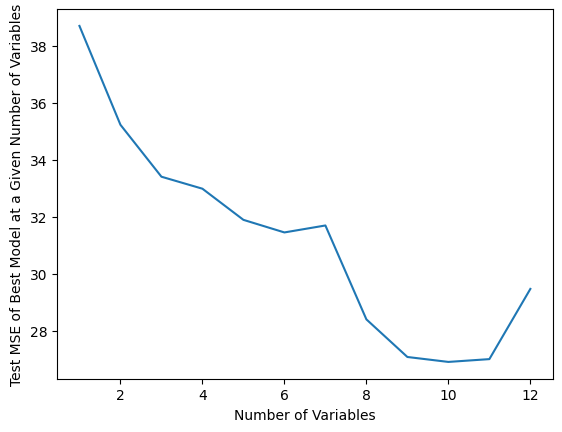

In [25]:
test_mse = forwardSelection(df)
test_mse_results = pd.DataFrame({"numVar":np.arange(1, len(test_mse) + 1), "testMSE":test_mse})
plt.plot(test_mse_results["numVar"], test_mse_results["testMSE"])
plt.xlabel("Number of Variables")
plt.ylabel("Test MSE of Best Model at a Given Number of Variables")

## Visualizations

### Predicted vs. Actual Plot

A scatter plot showing the relationship between predicted and actual median home values. The red line represents perfect prediction


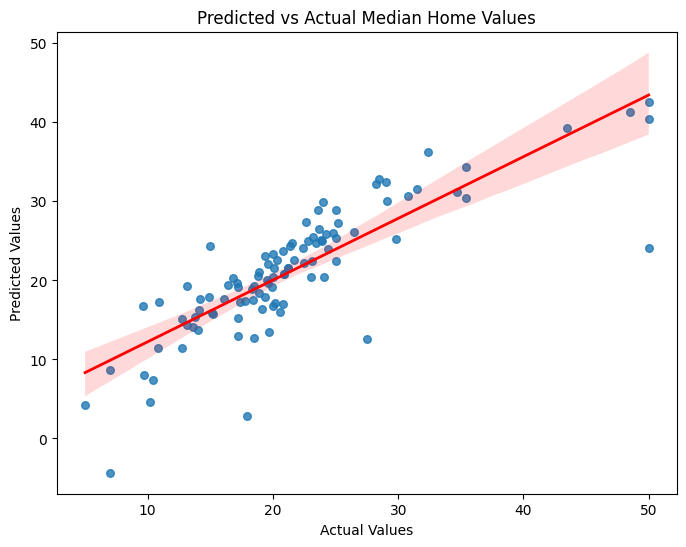

In [26]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 30}, line_kws={'color': 'red', 'lw': 2})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Median Home Values")
plt.show()

# Residual Histogram

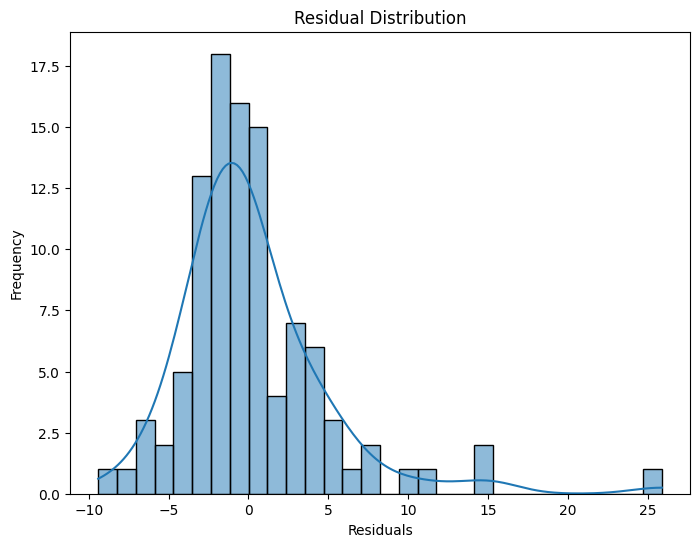

In [27]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()